# Google Colab 한글 폰트 설치

In [6]:
#import sys

# Google Colab 환경에서 실행 중인지 확인
#if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
 #   !echo 'debconf debconf/frontend select Noninteractive' | \
  #  debconf-set-selections

    # fonts-nanum 패키지를 설치
   # !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    #import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    #font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    #for fpath in font_files:
     #   fm.fontManager.addfont(fpath)

In [3]:
#import matplotlib.pyplot as plt

#plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
#plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
#print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


- 테스트

In [7]:
# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

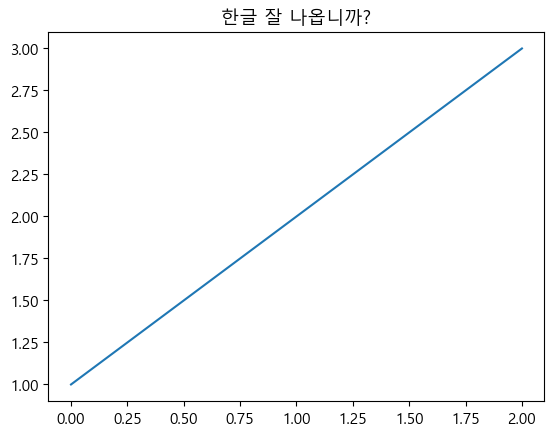

In [8]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# Google Colab과 드라이브 연동

In [9]:
#from google.colab import drive
#drive.mount("/content/drive")

# z-검정, t-검정
- 평균 차이 검정
- z검정
  + 모수의 분산, 표준편차 등을 알고 있어야 함

In [10]:
import pandas as pd
df = pd.DataFrame({"grades" : [50, 60, 60, 64, 66, 66, 67, 69, 70, 74, 76, 76, 77, 79, 79, 79, 81, 82, 82, 89]})
df.head()

,grades
0,50
1,60
2,60
3,64
4,66


- 모수의 표준편차는 9.5로 알고 있음

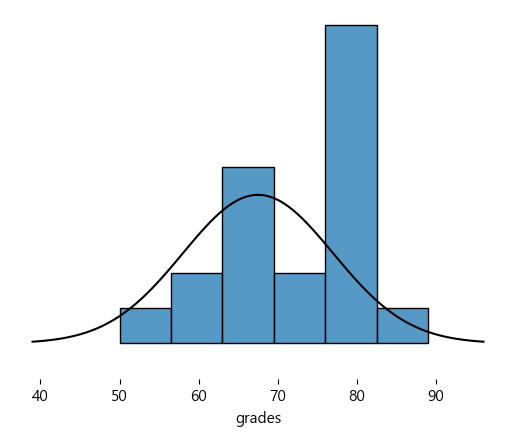

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

mu = 67.5       # 모수의 평균
sigma = 9.5     # 모수의 편차
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 100* stats.norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax1 = sns.histplot(df['grades'])

ax2 = sns.lineplot(x=x,y=y, color='black')

plt.ylim(bottom=-1)

ax1.set_frame_on(False)
ax1.axes.get_yaxis().set_visible(False)

plt.show()

## 가설수립
- 귀무가설 : 모집단의 수학점수 평균과 1반의 수학점수 평균차이는 없다!
- 대립가설 : 모집단의 수학점수 평균과 1반의 수학점수 평균차이는 있다.

## z-score 구하기

In [12]:
import math
sample_mean = df['grades'].mean()
sd_true = 9.5
mu_null = 67.5
N = len(df['grades'])
sem_true = sd_true / math.sqrt(N)
z_score = (sample_mean - mu_null) / sem_true
z_score # 통계량

np.float64(2.259605535157681)

## p-value

In [13]:
from statistics import NormalDist

lower_area = NormalDist().cdf(-z_score)
upper_area = lower_area
p_value = lower_area + upper_area
p_value

0.023845743764939753

# t-검정의 종류
- One-Sample t-test (일표본 단일검정)
- Paired t-test (대응표본)
- Independent t-test (두 평균의 비교, 독립검정)

## One-Sample t-test
- 일표본 단일검정
- z-검정과의 차이점
  + 모집단의 표준편차를 모름
  + 모집단의 평균을 알고 있음
  + 자유도 : N-1 (z-검정은 N)
- 모집단의 평균 : 사회적인 통념, 알려진 사실
- 가설설정
  + 귀무가설 : 모집단의 평균과 표본의 평균은 같다.
    - 오리온 초코칩의 무게중량 45g이 맞을 것이야
  + 대립가설 : 모집단의 평균과 표본의 평균은 다르다.
    - 오리온 초코칩의 무게중량 45g이 아니다!


In [14]:
N = len(df['grades'])
degfree = N-1
sample_mean = df['grades'].mean()
print('Sample mean:', sample_mean)
print('Degrees of freedom:', degfree)

Sample mean: 72.3
Degrees of freedom: 19


In [15]:
from scipy.stats import ttest_1samp

t, p = ttest_1samp(a = df['grades'], popmean = 71)
t, p

(np.float64(0.6106514014810425), np.float64(0.5486662606700853))

- 신뢰구간 추정

In [16]:
from scipy import stats

confidence_level = 0.95
degrees_freedom = len(df['grades'])-1
sample_mean = df['grades'].mean()
sample_standard_error = df['grades'].sem()

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
confidence_interval

(np.float64(67.84421513791415), np.float64(76.75578486208585))

In [17]:
ttest_1samp(a = df['grades'], popmean = 71).confidence_interval()

ConfidenceInterval(low=np.float64(67.84421513791415), high=np.float64(76.75578486208585))

## 문제
- 주어진 데이터(data/trees.csv)에는 블랙 체리나무 31그루의 둘레와 높이, 부피가 저장되어 있다. 체리나무의 평균 높이는 75로 알려져 있다. 이 높이에 대해서 이 표본의 평균이 모평균과 일치하는지 단일표본 t-검정(One Sample t-test)을 통해 답하고자 한다. 가설은 아래와 같다.
- 가설검정
    + 귀무가설 : 체리나무의 모평균(평균 75)과 표본평균(평균 75)의 차이는 0이다.
    + 대립가설 : 체리나무의 모평균과 표본평균이 차이가는 같지 않다.
- 데이터의 변수
    + Girth : 둘레
    + Height : 높이
    + Volume : 부피
- 단, 데이터의 각 변수들은 정규 분포를 만족한다고 가정한다. -> 중심극한정리 (central limit theorem clt)
- 문제 1 : 표본평균 X를 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 2 : 위의 가설을 검정하기 위한 검정통계량을 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 3 : 위의 통계량에 대한 p-값을 구하고(반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.

In [18]:
trees = pd.read_csv("dataset/trees.csv")
trees.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [19]:
# 문제 1: 표본평균 x 구하기
result = trees['Height'].mean()
result

np.float64(76.0)

In [21]:
# 문제 2
from scipy import stats

t, p = stats.ttest_1samp(trees['Height'], popmean = 75)
t, p

(np.float64(0.8738116490580545), np.float64(0.38916223357338076))

In [22]:
# 문제 3
if p>= 0.05:
  print("귀무가설 채택")
else:
  print("귀무가설 기각 ==> 대립가설 채택")

귀무가설 채택
